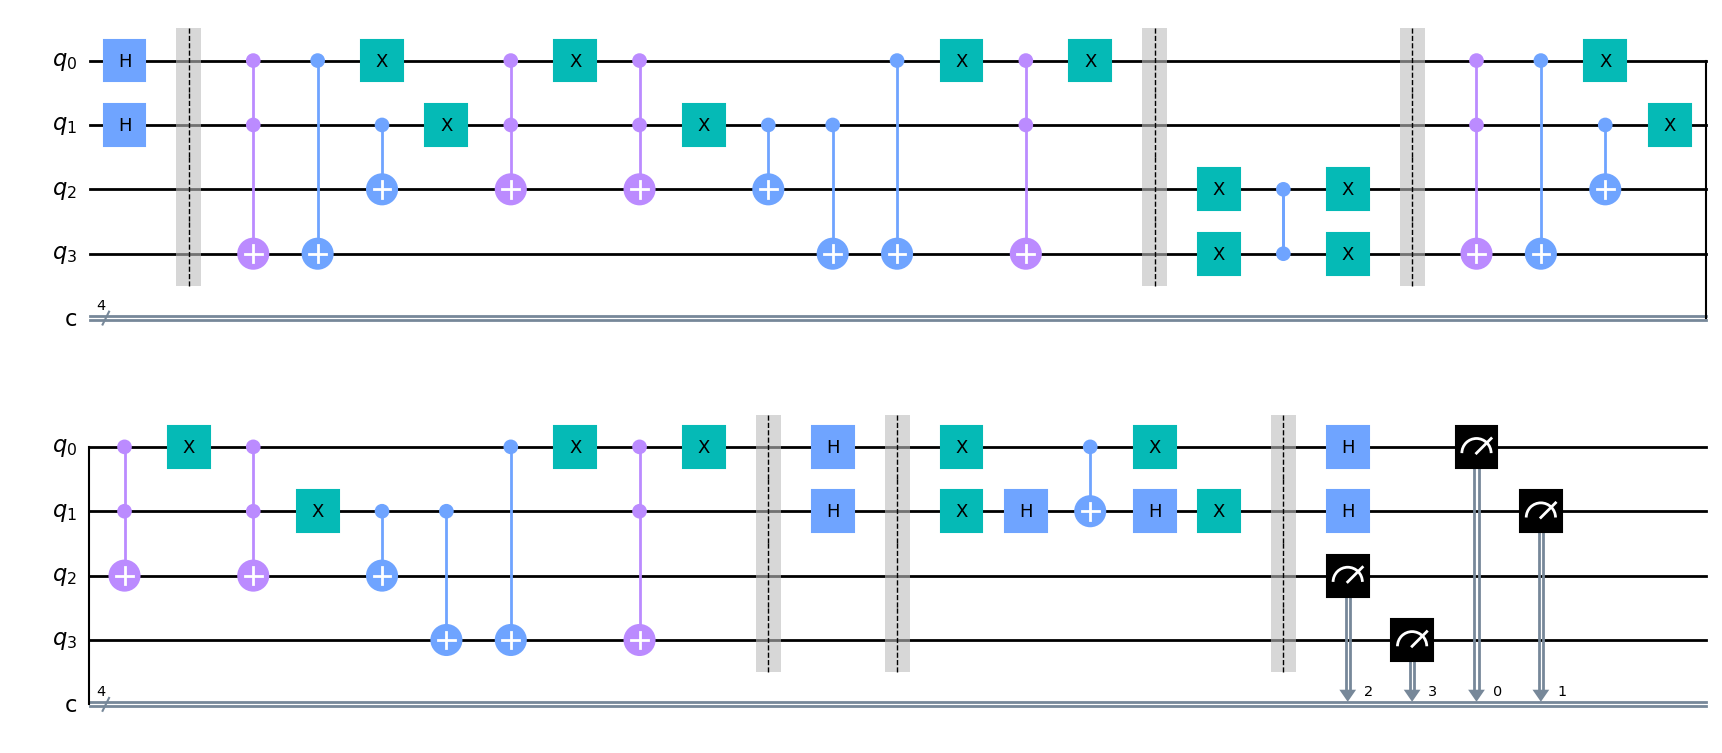

In [11]:
from qiskit.circuit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import Aer
from qiskit import execute


state = QuantumCircuit(4)

state.h(0)
state.h(1)

#primeira aplicação da UF

state.barrier()

state.ccx(0,1,3)

state.cx(0,3)

state.cx(1,2)

state.x(0)
state.x(1)
state.ccx(0,1,2)
state.x(0)

state.ccx(0,1,2)
state.x(1)

state.cx(1,2)

state.cx(1,3)

state.cx(0,3)

state.x(0)
state.ccx(0,1,3)
state.x(0)

state.barrier()

#inversão de fase com a Z controlada

state.x(2)
state.x(3)
state.cz(2,3)
state.x(2)
state.x(3)

#segunda aplicação da UF

state.barrier()

state.ccx(0,1,3)

state.cx(0,3)

state.cx(1,2)

state.x(0)
state.x(1)
state.ccx(0,1,2)
state.x(0)

state.ccx(0,1,2)
state.x(1)

state.cx(1,2)

state.cx(1,3)

state.cx(0,3)

state.x(0)
state.ccx(0,1,3)
state.x(0)

state.barrier()

state.h(0)
state.h(1)

#inversão sobre a média

state.barrier()

state.x(0)
state.x(1)

state.h(1)

state.cx(0,1)

state.x(0)

state.h(1)

state.x(1)

state.barrier()

state.h(0)
state.h(1)

mins = QuantumCircuit(4,4)

mins.measure(range(4), range(4))

qc = state.compose(mins)

qc.draw('mpl')


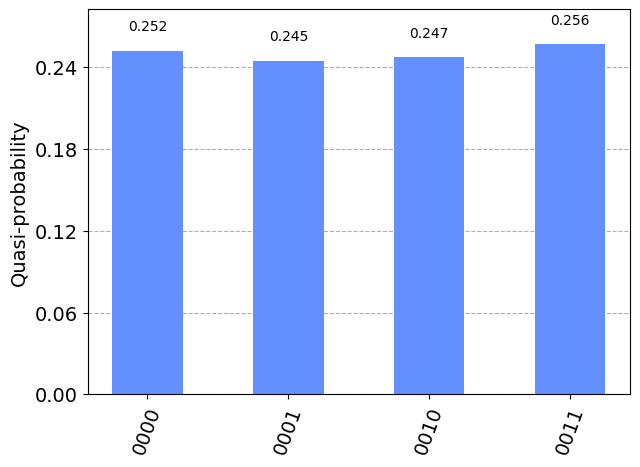

In [33]:
backend = Aer.get_backend('qasm_simulator')

shots = 8096

job_sim = execute(qc, backend, shots=shots)

result_sim = job_sim.result()

counts = result_sim.get_counts(qc)

for key in counts.keys():
    counts[key] = counts[key]/shots

plot_histogram(counts,)